In [1]:
from os import listdir
from os.path import isfile, join
import yaml
from glob import glob
import shutil, os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cwd = '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/'

with open(join(cwd,'train.txt'), 'w') as f:
    for path in glob('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/train/*'):
        f.write(path+'\n')

with open(join(cwd,'val.txt'), 'w') as f:
    for path in glob('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/val/*'):
        f.write(path+'\n')

with open(join(cwd,'test.txt'), 'w') as f:
    for path in glob('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test/*'):
        f.write(path+'\n')            

data = dict(
    train =  join( cwd , 'train.txt') ,
    val   =  join( cwd , 'val.txt' ),
    nc    = 1,
    names = ['Consolidation']
)


In [4]:
with open(join( cwd , 'vinbigdata.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(join( cwd , 'vinbigdata.yaml'), 'r')
print('\nyaml:')
print(f.read())



yaml:
names:
- Consolidation
nc: 1
train: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train.txt
val: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/val.txt



In [ ]:
# https://www.kaggle.com/ultralytics/yolov5
###############################################
# Lo comentamos para poder hacer run all
#!git clone https://github.com/ultralytics/yolov5  # clone repo


Cloning into 'yolov5'...
remote: Enumerating objects: 5437, done.
remote: Total 5437 (delta 0), reused 0 (delta 0), pack-reused 5437
Receiving objects: 100% (5437/5437), 8.07 MiB | 35.29 MiB/s, done.
Resolving deltas: 100% (3715/3715), done.


In [6]:
#shutil.copytree('/content/yolov5', '/content/drive/MyDrive/2020 - Quinto Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5')
os.chdir( '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5') #hacemos a esta direccion nuestro WD.

In [7]:
%pip install -qr requirements.txt # install dependencies

     |████████████████████████████████| 645kB 10.8MB/s 


In [8]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/2 /content/drive/My Drive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.060s)
image 2/2 /content/drive/My Drive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.010s)
Results saved to runs/detect/exp14
Done. (1.023s)


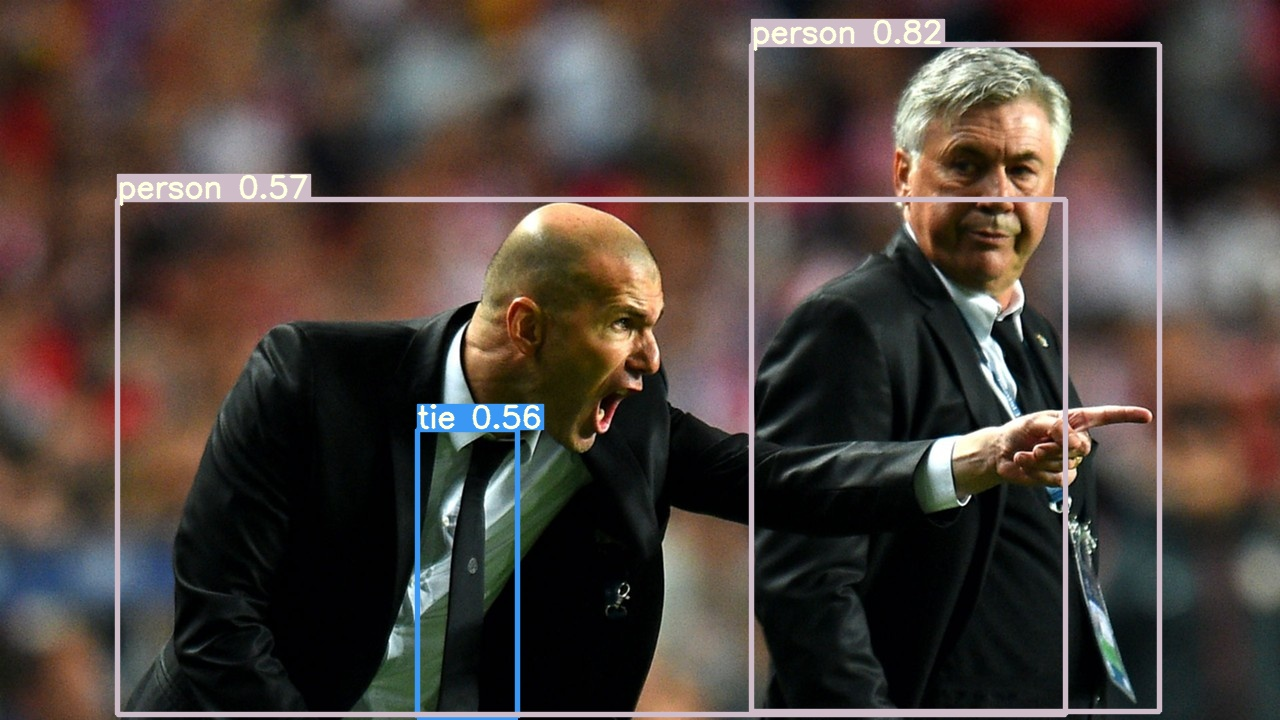

In [9]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

#Train

In [10]:
!WANDB_MODE="dryrun" python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/vinbigdata.yaml --weights  yolov5x.pt --cache

remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 235 (delta 101), reused 96 (delta 79), pack-reused 104
Receiving objects: 100% (235/235), 125.85 KiB | 5.99 MiB/s, done.
Resolving deltas: 100% (150/150), completed with 30 local objects.
From https://github.com/ultralytics/yolov5
   333ccc5..6dd1083  master                 -> origin/master
 * [new branch]      glenn-jocher-patch-1   -> origin/glenn-jocher-patch-1
 * [new branch]      glenn-jocher-patch-1-1 -> origin/glenn-jocher-patch-1-1
 + 5996576...22ecfe2 glenn-jocher-patch-2   -> origin/glenn-jocher-patch-2  (forced update)
 * [new branch]      glenn-jocher-patch-3   -> origin/glenn-jocher-patch-3
 * [new branch]      hyp                    -> origin/hyp
 * [new branch]      study_activations      -> origin/study_activations
github: ⚠️ WARNING: code is out of date by 55 commits. Use 'git pull' to update or 'git clone https://github

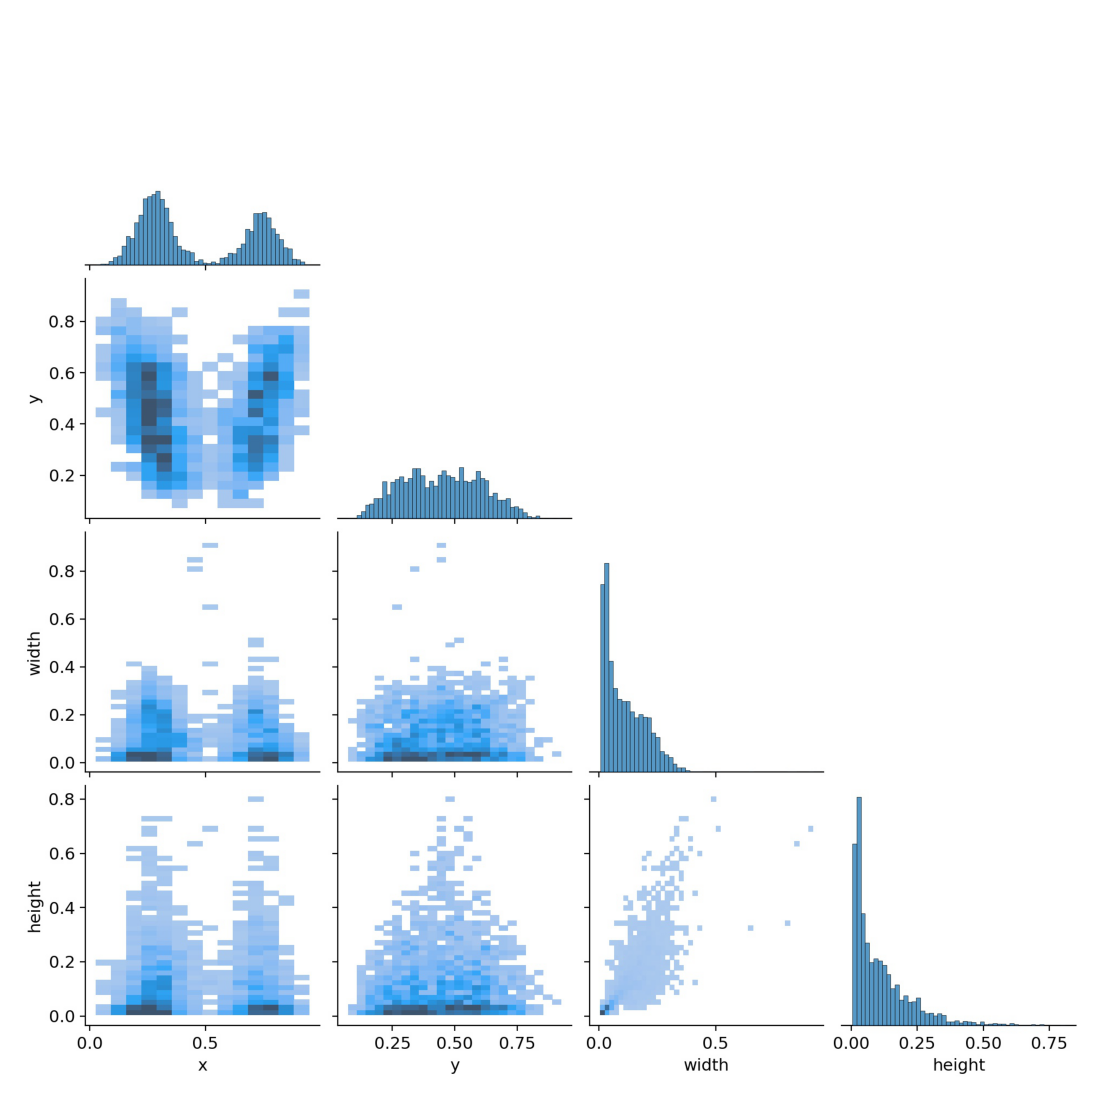

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/labels_correlogram.jpg'));

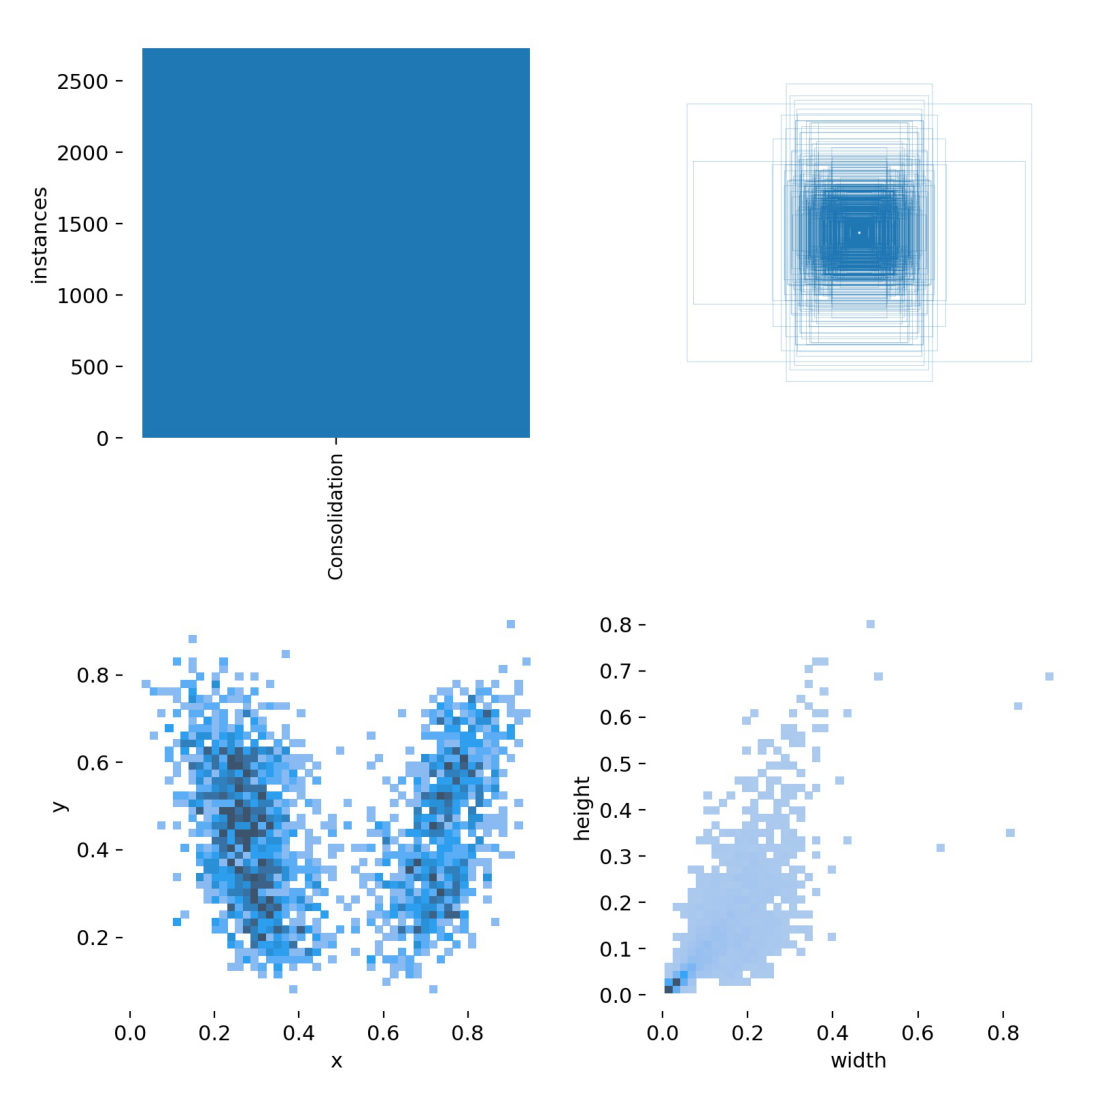

In [ ]:
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/labels.jpg'));

In [ ]:
plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/train_batch0.jpg'))

plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/train_batch1.jpg'))

plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/train_batch2.jpg'))


Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


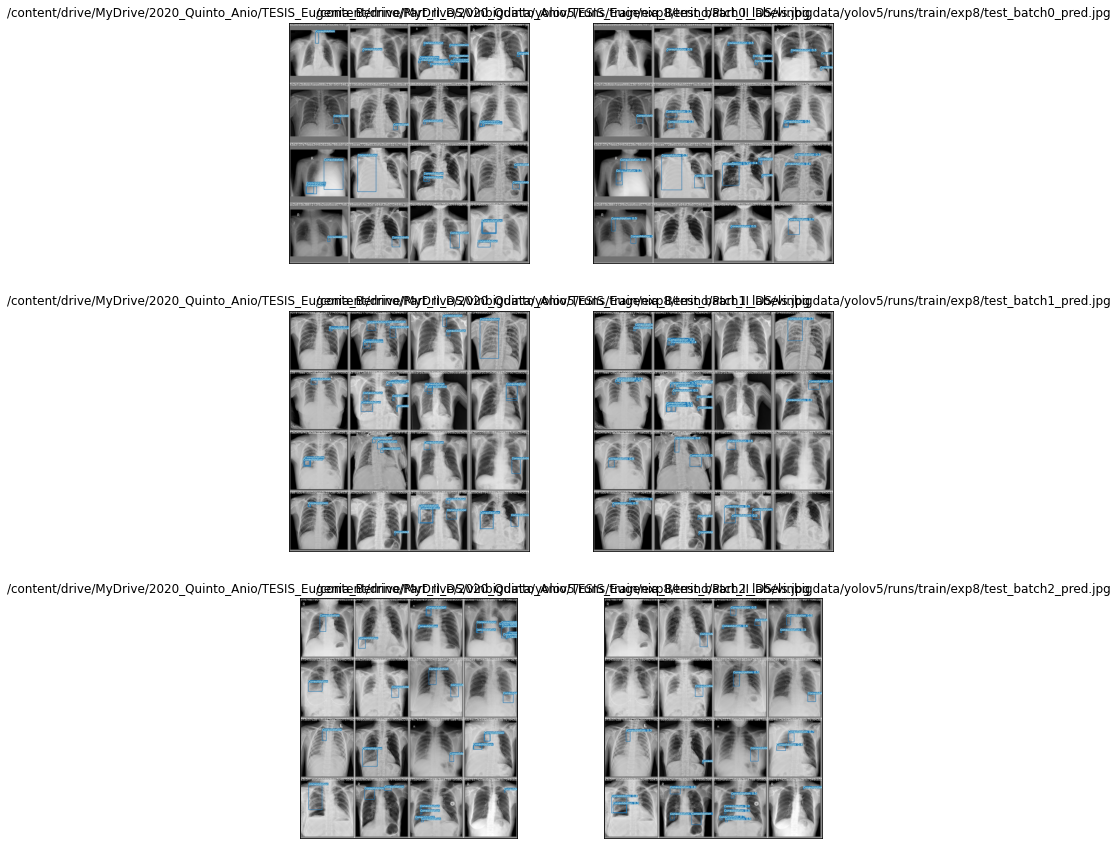

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (2*5,3*5), constrained_layout = True)
for row in range(3):
    ax[row][0].imshow(plt.imread(f'/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/test_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/test_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(plt.imread(f'/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/test_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/test_batch{row}_pred.jpg', fontsize = 12)


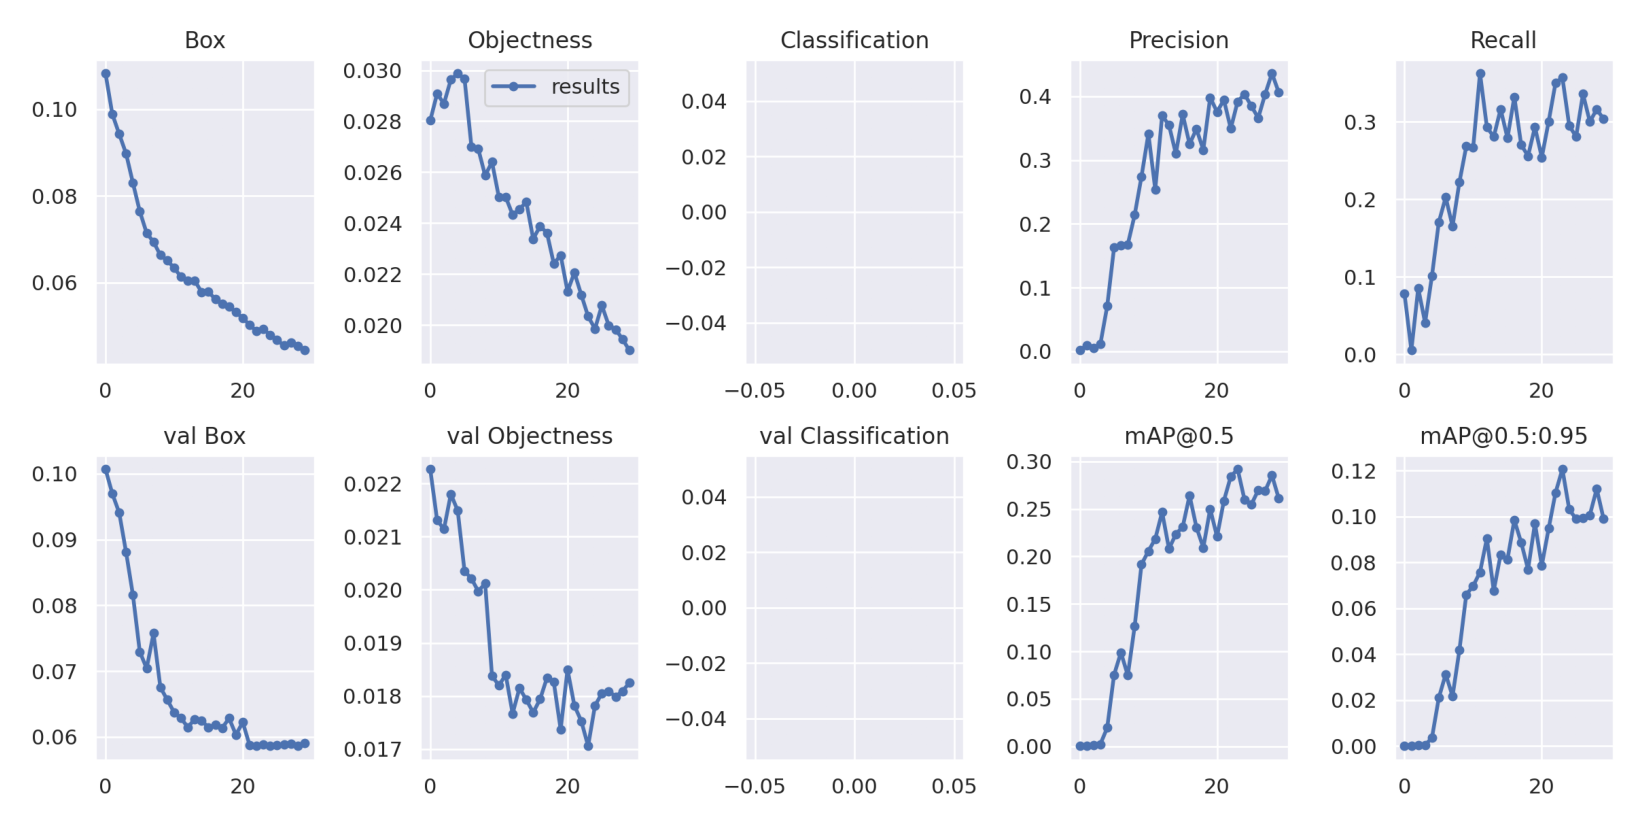

In [ ]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/results.png'));

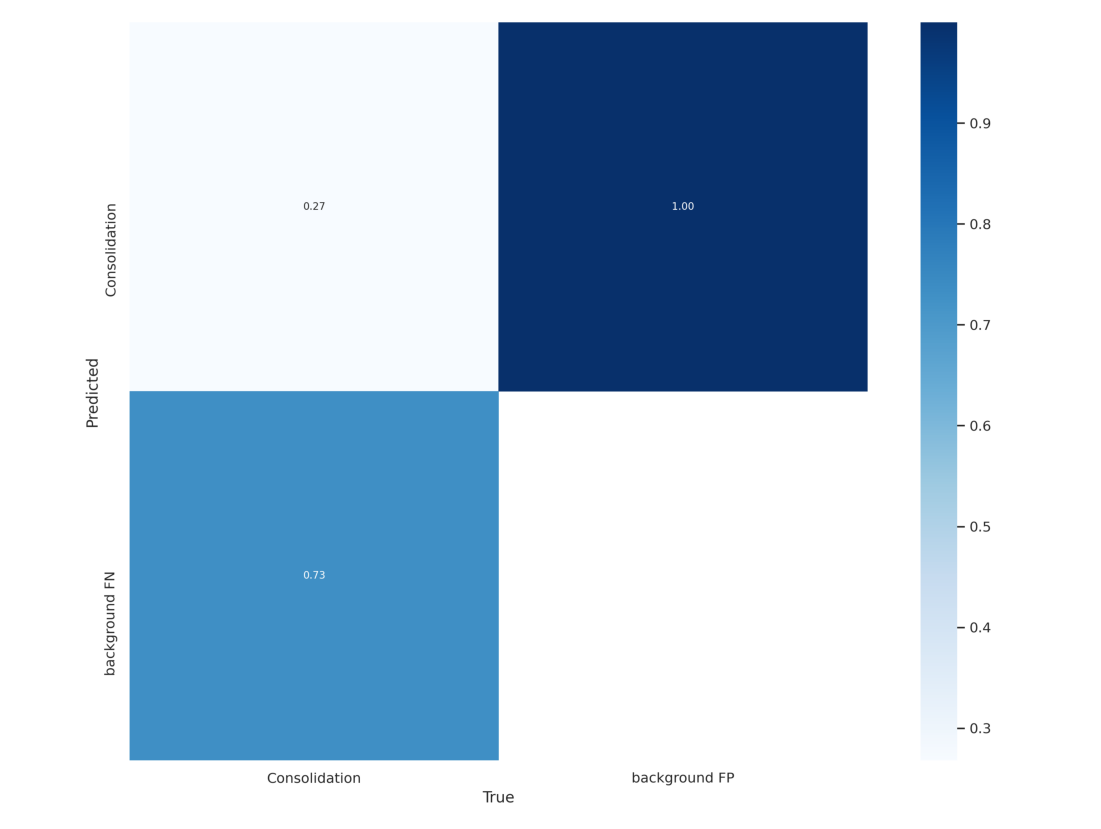

In [ ]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/2020_Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/confusion_matrix.png'));

In [ ]:
# Trabaja con argparse.
os.chdir( '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5')
!python detect.py --weights '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/weights/best.pt' --img 640 --source /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test --exist-ok --conf 0.15 --iou 0.5




Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.15, device='', exist_ok=True, img_size=640, iou_thres=0.5, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test', update=False, view_img=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 308 layers, 21037638 parameters, 0 gradients, 50.3 GFLOPS
image 1/278 /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test/0005e8e3701dfb1dd93d53e2ff537b6e.jpg: 640x640 2 Consolidations, Done. (0.021s)
image 2/278 /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/images/test/00150343289f317a0ad5629d5b7d9ef9.jpg: 640x640 2 Consolidations, Done. (0.020s)
image 3/278 /content/drive/MyDrive/Quinto

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random
import cv2
from glob import glob
from tqdm import tqdm

files = glob('runs/detect/exp/*')
for _ in range(3):
    row = 4
    col = 4
    grid_files = random.sample(files, row*col)
    images     = []
    for image_path in tqdm(grid_files):
        img          = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        images.append(img)

    fig = plt.figure(figsize=(col*5, row*5))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(col, row),  # creates 2x2 grid of axes
                     axes_pad=0.05,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
test_data = dict(
    train =  join( cwd , 'train.txt'),
    val   =  join( cwd , 'val.txt' ),
    test =  join( cwd , 'test.txt') ,
    nc    = 1,
    names = ['Consolidation']
)

In [ ]:
with open(join( cwd , 'test_vinbigdata.yaml'), 'w') as outfile:
    yaml.dump(test_data, outfile, default_flow_style=False)

f = open(join( cwd , 'test_vinbigdata.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
names:
- Consolidation
nc: 1
test: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test.txt
train: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/train.txt
val: /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/val.txt



In [ ]:
!python test.py --weights '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/weights/best.pt' --data /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml --img 640 --conf 0.001 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/test_vinbigdata.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/yolov5/runs/train/exp8/weights/best.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 308 layers, 21037638 parameters, 0 gradients, 50.3 GFLOPS
val: Scanning '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Part_II_DS/vinbigdata/val.cache' images and labels... 278 found, 0 missing, 0 empty, 56 corrupted: 100% 278/278 [00:00<00:00, 2523845.26it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95:   0% 0/7 [00:00<?, ?it/s